In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, roc_auc_score
import lightgbm as lgb
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import label_binarize

In [2]:
file_path = r'C:\\Users\\DELL\Downloads\\archive\\extracted_data\\cleaned_online_shoppers_intention.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2

CHECKING THE DATA IS CLEAN

In [5]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [6]:
print(df.drop_duplicates())

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12200               3                    145.0              0   
12201               0                      0.0              0   
12202               0                      0.0              0   
12203               4                     75.0              0   
12204               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [8]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                       bool
Revenue                       bool
dtype: object


ENCODING CATEGORICAL COLUMNS WITH LABEL ENCODER

In [9]:
label_encoder = LabelEncoder()
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'VisitorType']
for column in categorical_columns: df[column] = label_encoder.fit_transform(df[column])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,0,0,1,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,1,1,0,2,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,3,0,8,3,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,1,1,4,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,2,2,0,4,2,True,False


ENCODING BOOLEAN VALUES

In [10]:
#Encoding the 'Revenue' column as Boolean (Non-Purchaser vs Purchaser)
df['Revenue'] = df['Revenue'].map({True:1, False:0})
df['Revenue'].value_counts()

Revenue
0    10297
1     1908
Name: count, dtype: int64

FEATURE SCALING FOR NUMERICAL COLUMNS

In [11]:
numerical_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,2,0,0,0,1,2,False,0
1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,-0.318962,-0.31024,2,1,1,0,2,2,False,0
2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,-0.318962,-0.31024,2,3,0,8,3,2,False,0
3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,-0.318962,-0.31024,2,2,1,1,4,2,False,0
4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,-0.318962,-0.31024,2,2,2,0,4,2,True,0


DATA VISUALIZATION

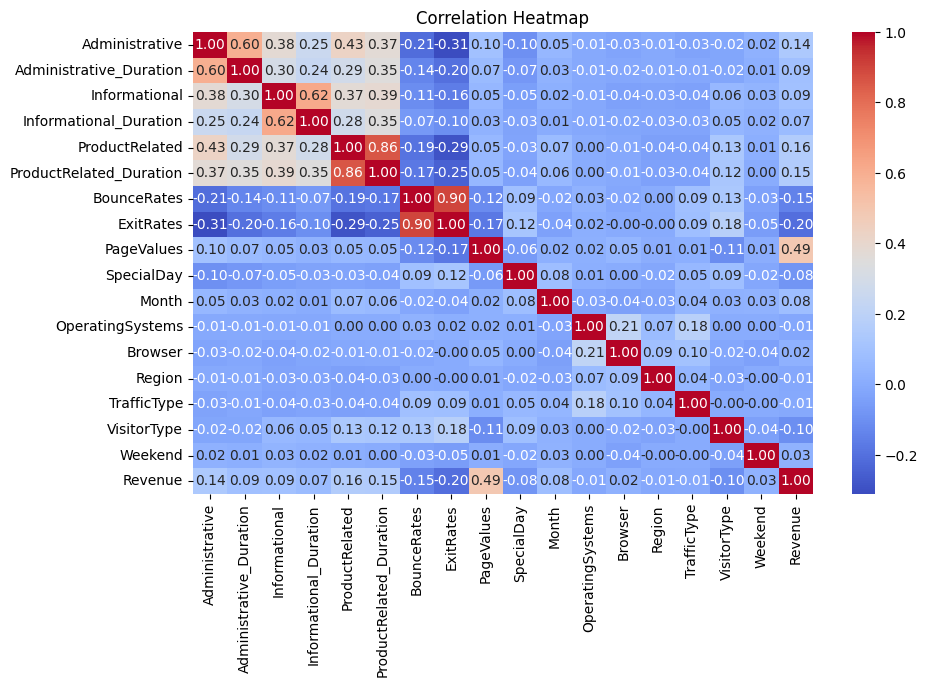

In [12]:
#Visualizing distribution of key features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("Correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

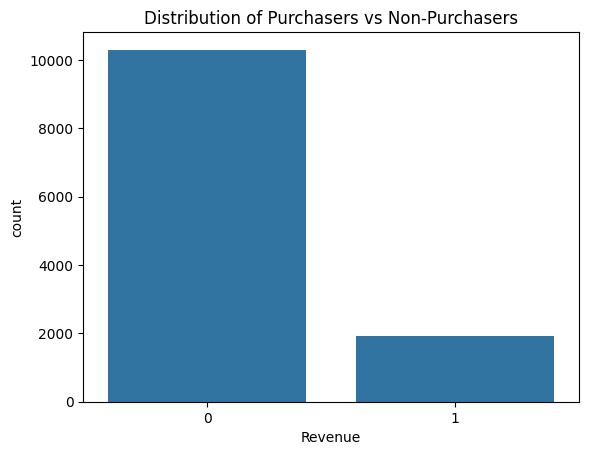

In [13]:
#Visualizing the distribution of 'Revenue'(Non-Purchaser vs Purchaser)
sns.countplot(x='Revenue', data=df)
plt.title("Distribution of Purchasers vs Non-Purchasers")
plt.savefig("purchasers_distribution.png", dpi = 300, bbox_inches='tight')
plt.show()

SUPERVISED LEARNING

RANDOM FOREST CALSSIFIER 

In [21]:
X = df.drop('Revenue', axis=1)
y =df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

Random Forest Classifier Results:
Accuracy: 0.9041376485047112
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2079
           1       0.74      0.54      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg       0.90      0.90      0.90      2441

Confusion Matrix:
 [[2010   69]
 [ 165  197]]


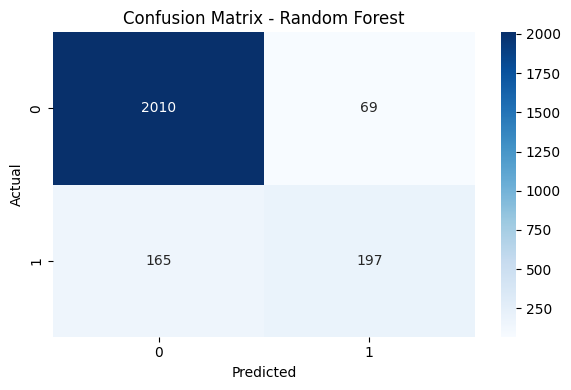

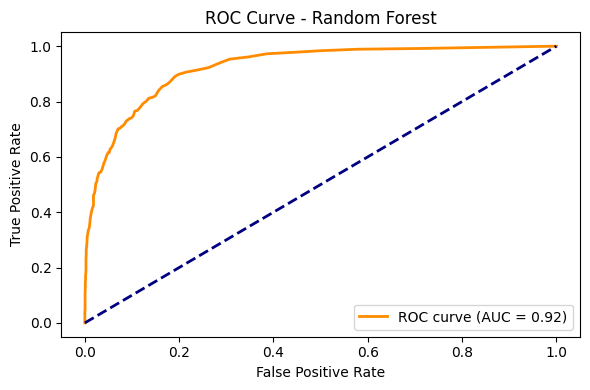

In [25]:
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.savefig("confusion_matrix_rf.png")  
plt.show()

if len(np.unique(y)) == 2:
    y_score = rf_model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Random Forest')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_curve_rf.png")  
    plt.show()
else:
    print("ROC Curve is supported for binary classification only.")

LOGISTIC REGRESSION 

Logistic Regression Accuracy:0.8878

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2079
           1       0.75      0.36      0.49       362

    accuracy                           0.89      2441
   macro avg       0.82      0.67      0.71      2441
weighted avg       0.88      0.89      0.87      2441



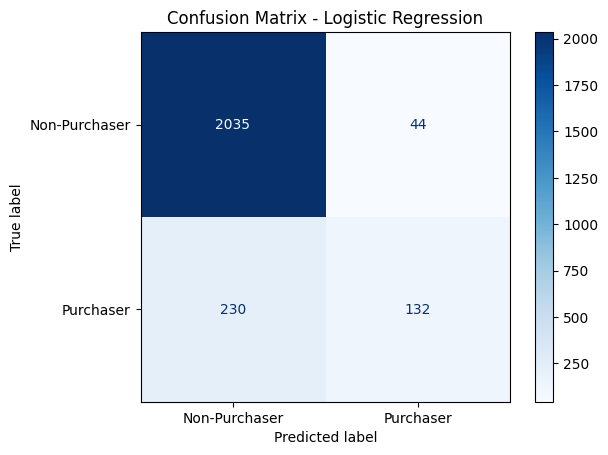

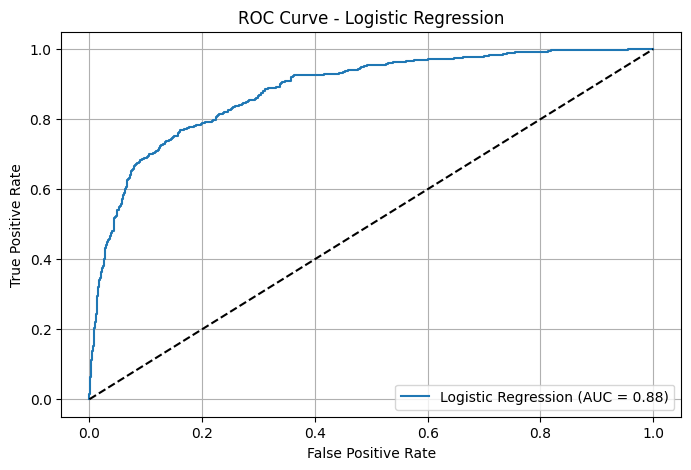

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_probs_log = model.predict_proba(X_test)[:, 1]
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy:{acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Purchaser', 'Purchaser'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("logistic_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
#ROC Curve
fpr_log, tpr_log, _ =roc_curve(y_test, y_probs_log)
roc_auc_log = roc_auc_score(y_test, y_probs_log)
plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.savefig("logistic_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

DECISION TREE CLASSIFIER

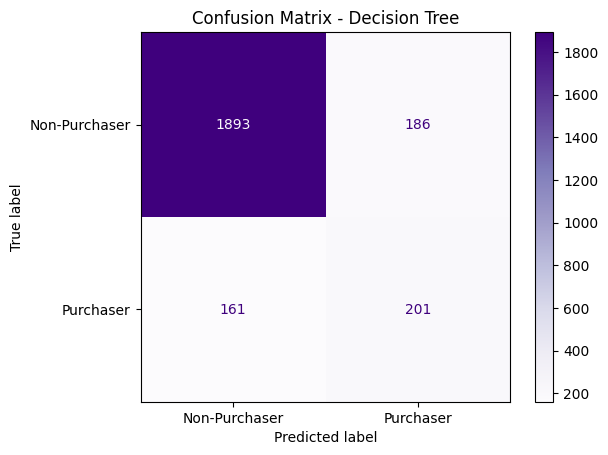

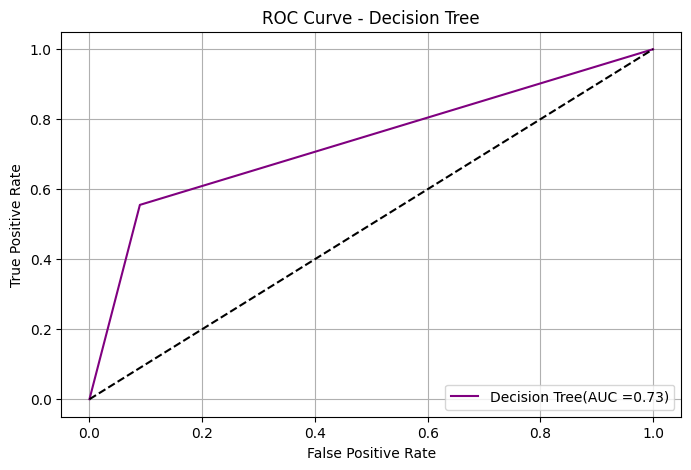

In [27]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Non-Purchaser', 'Purchaser'])
disp_dt.plot(cmap='Purples')
plt.title("Confusion Matrix - Decision Tree")
plt.savefig("decision_tree_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
#ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)
plt.figure(figsize=(8, 5))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree(AUC ={roc_auc_dt:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("decision_tree_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

GRADIENT BOOSTING CLASSIFIER

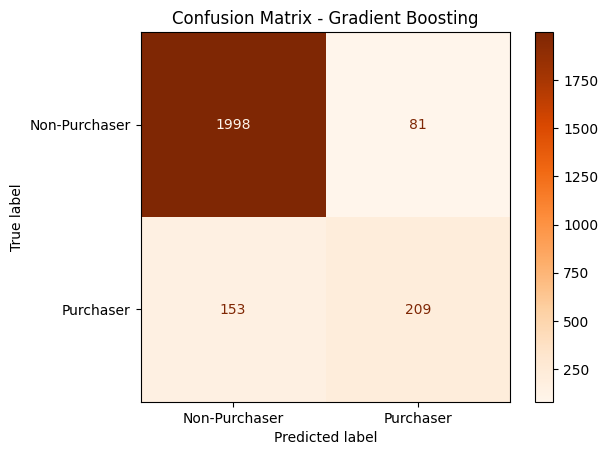

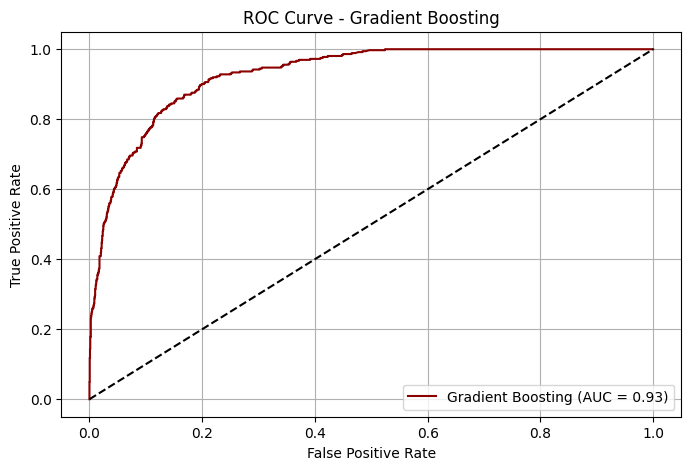

In [28]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_probs_gb =gb_model.predict_proba(X_test)[:, 1]
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['Non-Purchaser', 'Purchaser'])
disp_gb.plot(cmap='Oranges')
plt.title("Confusion Matrix - Gradient Boosting")
plt.savefig("gradient_boosting_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
#ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)
roc_auc_gb = roc_auc_gb = roc_auc_score(y_test, y_probs_gb)
plt.figure(figsize=(8,5))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='darkred')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("gradient_boosting_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

KNN CLASSIFIER

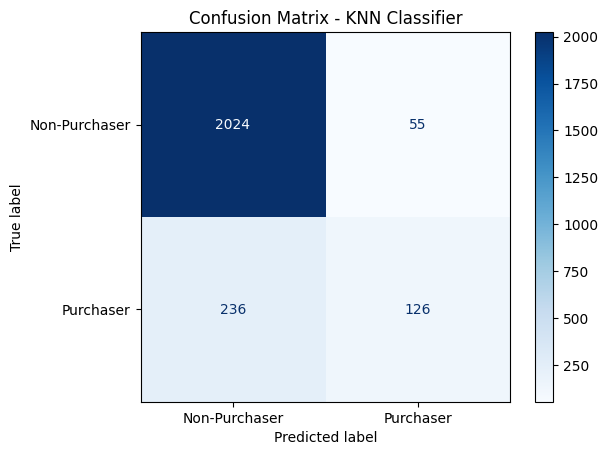

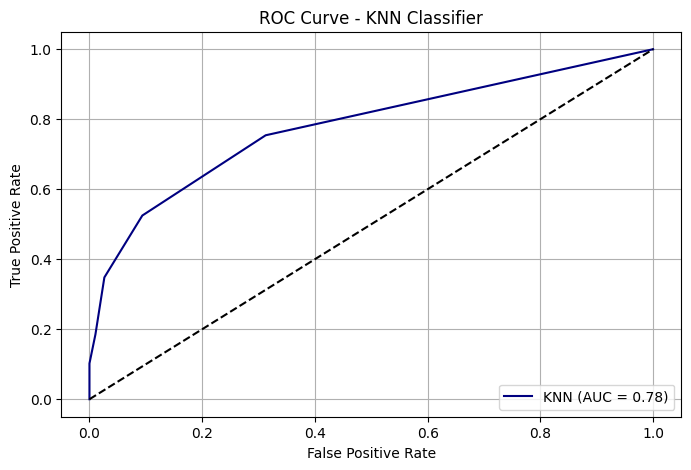

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]  
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Non-Purchaser', 'Purchaser'])
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN Classifier")
plt.savefig("knn_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
#ROC Curve 
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

plt.figure(figsize=(8, 5))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='navy')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("knn_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

LIGHTGBM CLASSIFIER

[LightGBM] [Info] Number of positive: 1546, number of negative: 8218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1893
[LightGBM] [Info] Number of data points in the train set: 9764, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158337 -> initscore=-1.670656
[LightGBM] [Info] Start training from score -1.670656


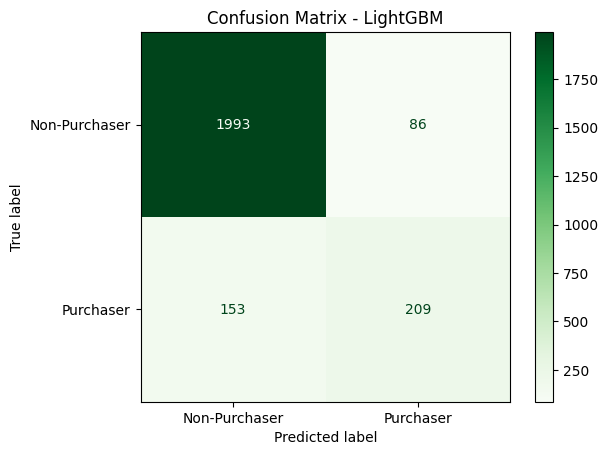

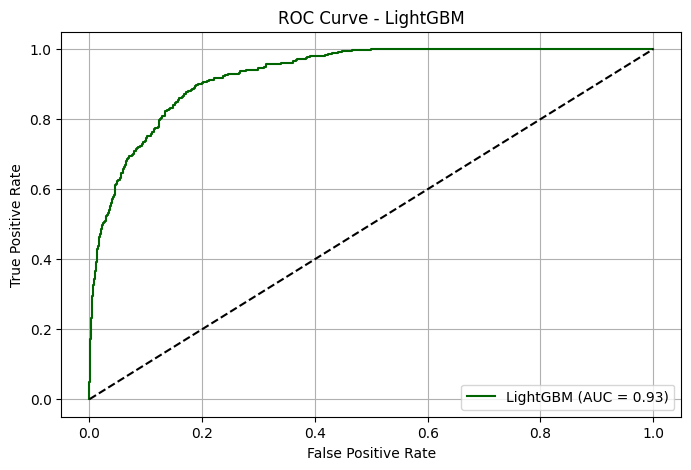

In [30]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_probs_lgb = lgb_model.predict_proba(X_test)[:, 1] 
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=['Non-Purchaser', 'Purchaser'])
disp_lgb.plot(cmap='Greens')
plt.title("Confusion Matrix - LightGBM")
plt.savefig("lightgbm_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
#ROC Curve
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_probs_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_probs_lgb)
plt.figure(figsize=(8, 5))
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.2f})', color='darkgreen')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.savefig("lightgbm_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

FINAL RESULTS

In [33]:
log_model = LogisticRegression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_probs_log = log_model.predict_proba(X_test)[:, 1]
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

model_results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "ROC AUC": []
}
models = {
    "Logistic Regression": (y_pred_log, y_probs_log),
    "Decision Tree": (y_pred_dt, y_probs_dt),
    "Random Forest": (y_pred_rf, y_probs_rf),
    "KNN": (y_pred_knn, y_probs_knn),
    "Gradient Boosting": (y_pred_gb, y_probs_gb),
    "LightGBM": (y_pred_lgb, y_probs_lgb)
}


for name, (y_pred, y_probs) in models.items():
    model_results["Model"].append(name)
    model_results["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_results["F1 Score"].append(f1_score(y_test, y_pred))
    model_results["ROC AUC"].append(roc_auc_score(y_test, y_probs))

CREATE DATA FRAME

In [34]:
results_df = pd.DataFrame(model_results)
print(results_df)

                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.887751  0.490706  0.882934
1        Decision Tree  0.857845  0.536716  0.732891
2        Random Forest  0.904138  0.627389  0.923474
3                  KNN  0.880787  0.464088  0.777956
4    Gradient Boosting  0.904138  0.641104  0.928127
5             LightGBM  0.902089  0.636225  0.929264


VISUALIZE FINAL COMPARISON

<Figure size 1200x600 with 0 Axes>

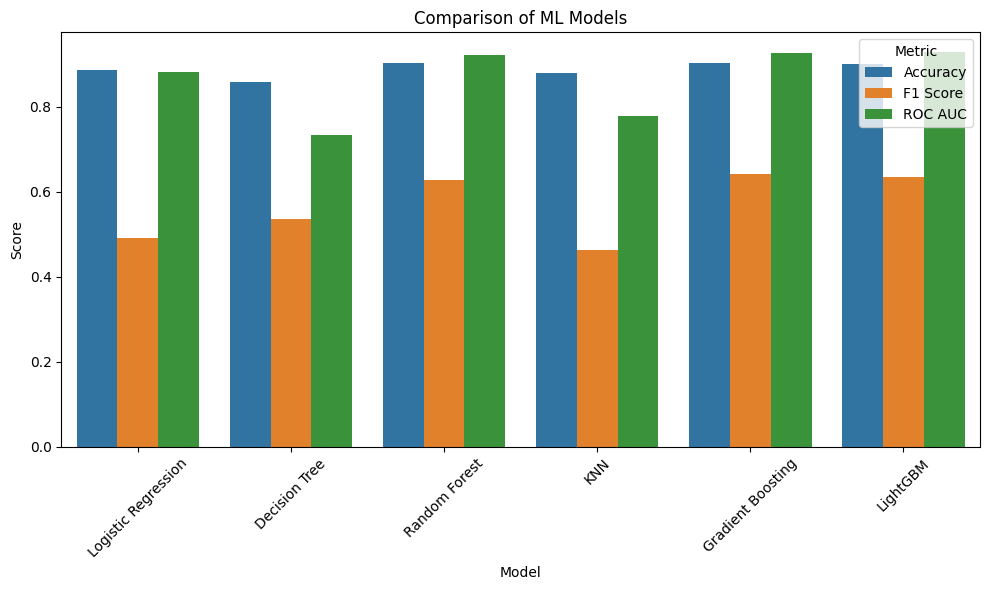

In [35]:
plt.figure(figsize=(12, 6))
melted_df = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x="Model", y="Score", hue="Metric")
plt.title("Comparison of ML Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300)
plt.show()

UNSUPERVISED LEARNING

KMEANS CLUSTERING

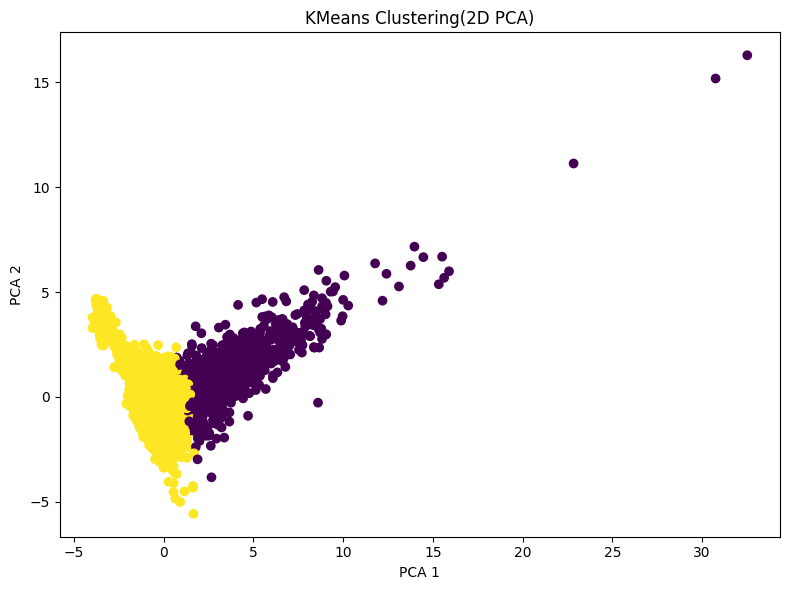

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering(2D PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()
plt.savefig("kmeans_clusters.png", dpi=300)
plt.show()

HIERARCHICAL CLUSTERING WITH DENDROGRAM

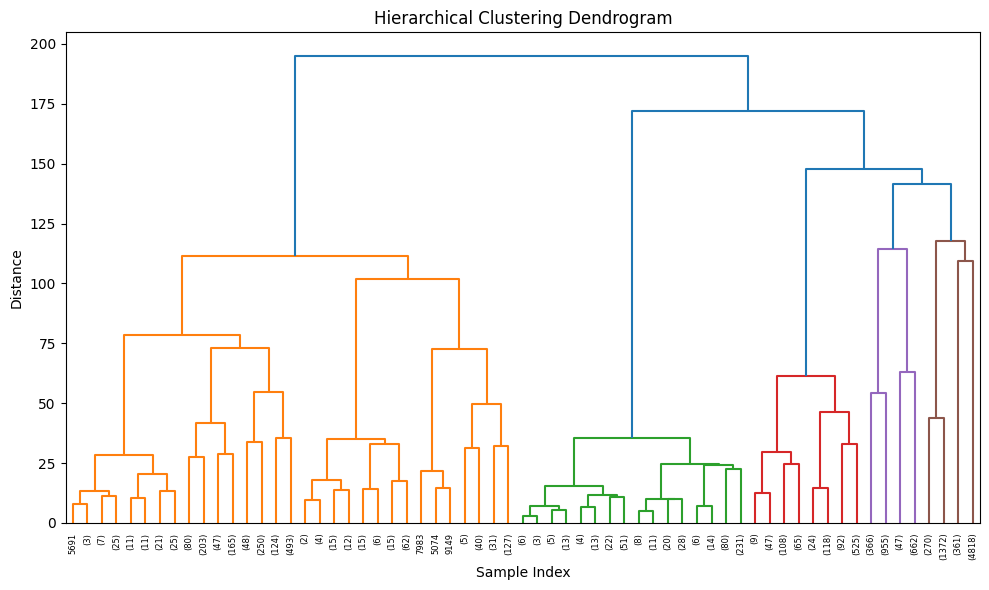

In [38]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.savefig("dendrogram.png", dpi=300)
plt.show()

SILHOUETTE SCORE FOR KMEANS 

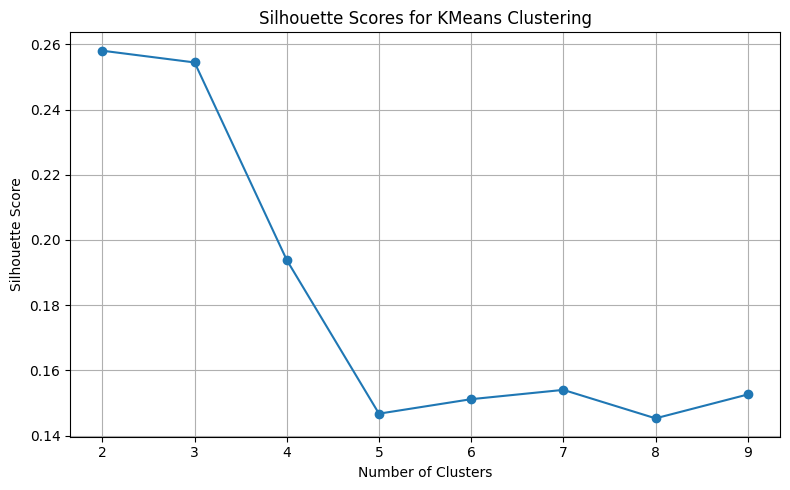

In [41]:
range_n_clusters = list(range(2, 10))
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, kmeans_labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.savefig("silhouette_scores.png", dpi=300)
plt.show()

SILHOUETTE SCORE FOR KMEANS

In [42]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_score:.4f}")


KMeans Silhouette Score: 0.2581


SILHOUETTE SCORE FOR HIERARCHICAL CLUSTERING

In [43]:
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)
print("Agglomerative Clustering Silhouette Score:{agg_score:.4f}")

Agglomerative Clustering Silhouette Score:{agg_score:.4f}


CONCLUSION

This project focused on understanding the behaviour of online shoppers and distinguishing between PURCHASERS and NON-PURCHASERS.
By applying various supervised machine learning models, including Logistic Regression, Decision Tree, KNN, Random Forest, Gradient Boosting and LightBGM, we aimed to accurately predict purchase intent. Among the models Gradient Boosting performed best, revealing strong predictive 
power. Clustering techniques were also used to uncover hidden patterns in user behaviour. This project highlights how machine learning can effectively 
classify online shoppers and support e-commerce businesses in targeting potential customers more strategically.

CLASSIFICATION

In [45]:
results_df.style.format({"Accuracy": "{:.3f}", "F1 Score": "{:.3f}", "ROC AUC": "{:.3F}"})

,Model,Accuracy,F1 Score,ROC AUC
0,Logistic Regression,0.888,0.491,0.883
1,Decision Tree,0.858,0.537,0.733
2,Random Forest,0.904,0.627,0.923
3,KNN,0.881,0.464,0.778
4,Gradient Boosting,0.904,0.641,0.928
5,LightGBM,0.902,0.636,0.929


Gradient Boosting achieved the highest F1 Score and ROC AUC, while Random Forest had the highest Accuracy. Gradient Boosting performs best across all three metrics, making it the most effective model for predicting purchaser behaviour in the dataset. 